Data on confirmed COVID-19 cases in Scotland by Health board taken from the Web Archive [WayBackMachine](https://web.archive.org/web/*/https://www. gov.scot/coronavirus-covid-19/) capture of the Scottish Government published health board data published since 2020-03-05 ( broken down by specific health boards ).

In [3]:
pip install html2text geopandas lxml matplotlib pandas word2number xarray 

Note: you may need to restart the kernel to use updated packages.


In [108]:
from datetime import datetime

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [53]:
import ScotlandCOVID19

In [19]:
yesterday = int(str(datetime.now())[:10].replace('-',''))-1

In [20]:
results = []
for date in range(20200306, yesterday):
    results.append(ScotlandCOVID19.from_date(str(date)))

20200306
 6 March 2020
20200307
 7 March 2020
20200308
 8 March 2020
20200309
 9 March 2020
20200310
10 March 2020
20200311
11 March 2020
20200312
12 March 2020
20200313
13 March 2020
20200314
14 March 2020
20200315
15 March 2020
20200316
16 March 2020
20200317
17 March 2020
20200318
18 March 2020
20200319
19 March 2020
20200320
20 March 2020
20200321
21 March 2020


In [133]:
results.append(ScotlandCOVID19.ScotlandCOVID19.from_latest_government())

Latest
23 March 2020


In [135]:
all_results = ScotlandCOVID19.ScotlandCOVID19Results(results)

In [24]:
all_results.to_netcdf()

In [165]:
all_results.counts

Health board,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Shetland,Tayside
date,,,,,,,,,,,,
2020-03-06,1,0,0,2,2,3,1,0,0,1,0,1
2020-03-07,1,0,0,2,2,4,2,0,2,2,0,1
2020-03-08,1,0,0,2,2,4,3,0,2,3,0,1
2020-03-09,1,0,0,2,2,4,3,0,3,5,2,1
2020-03-10,1,0,0,2,2,6,3,0,3,7,2,1
2020-03-11,3,2,0,2,2,6,5,0,4,8,2,2
2020-03-12,4,2,0,3,6,7,10,0,7,11,6,4
2020-03-13,4,3,0,4,6,11,21,0,7,20,6,3
2020-03-14,6,5,0,6,6,9,31,1,10,25,11,11


In [166]:
all_results.counts.diff().iloc[-1].sum()

83.0

In [138]:
all_results.tests.diff()

date
2020-03-06      NaN
2020-03-07    155.0
2020-03-08    277.0
2020-03-09    144.0
2020-03-10    133.0
2020-03-11     82.0
2020-03-12    576.0
2020-03-13    422.0
2020-03-14    401.0
2020-03-15    525.0
2020-03-16    655.0
2020-03-17    351.0
2020-03-18    845.0
2020-03-19    681.0
2020-03-20    778.0
2020-03-21    709.0
2020-03-22    420.0
2020-03-23    685.0
Name: Tests concluded, dtype: float64

In [122]:
all_results.counts.iloc[-2] - all_results.counts.iloc[-3].transpose()

Health board
Ayrshire and Arran            4
Borders                       1
Dumfries and Galloway         4
Fife                          3
Forth Valley                  6
Grampian                      1
Greater Glasgow and Clyde    20
Highland                      0
Lanarkshire                   8
Lothian                       5
Shetland                      0
Tayside                       4
dtype: int32

In [119]:
all_results.counts.iloc[-1] - all_results.counts.iloc[-2]

Health board
Ayrshire and Arran            5
Borders                       1
Dumfries and Galloway         3
Fife                          1
Forth Valley                  4
Grampian                      1
Greater Glasgow and Clyde    19
Highland                      2
Lanarkshire                   8
Lothian                       4
Shetland                      0
Tayside                       3
dtype: int32

In [30]:
count_difference.to_csv('data/daily_difference_in_counts.csv')

In [28]:
count_difference = all_results.counts.diff()

In [29]:
count_difference

Health board,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Shetland,Tayside
date,,,,,,,,,,,,
2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-07,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0
2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
2020-03-10,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
2020-03-11,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0
2020-03-12,1.0,0.0,0.0,1.0,4.0,1.0,5.0,0.0,3.0,3.0,4.0,2.0
2020-03-13,0.0,1.0,0.0,1.0,0.0,4.0,11.0,0.0,0.0,9.0,0.0,-1.0
2020-03-14,2.0,2.0,0.0,2.0,0.0,-2.0,10.0,1.0,3.0,5.0,5.0,8.0


In [31]:
all_results.counts.to_csv('data/daily_counts_by_health_board.csv')

In [37]:
print("Daily increase in number of test concluded")
daily_increase_in_tests_concluded = all_results.tests.diff()[1:].astype('int')
print(daily_increase_in_tests_concluded)
daily_increase_in_tests_concluded.to_csv('data/daily_increase_in_tests_concluded.csv')

Daily increase in number of test concluded
date
2020-03-07    155
2020-03-08    277
2020-03-09    144
2020-03-10    133
2020-03-11     82
2020-03-12    576
2020-03-13    422
2020-03-14    401
2020-03-15    525
2020-03-16    655
2020-03-17    351
2020-03-18    845
2020-03-19    681
2020-03-20    778
2020-03-21    709
2020-03-22    420
Name: Tests concluded, dtype: int32


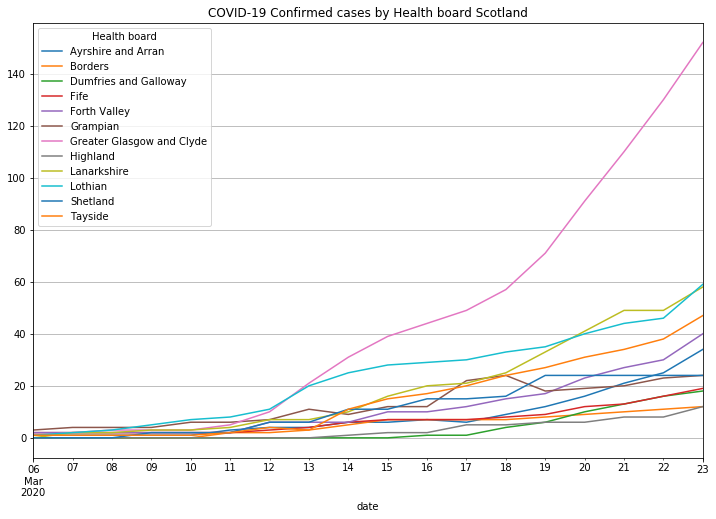

In [163]:
all_results.counts.plot(figsize=(12,8), title='COVID-19 Confirmed cases by Health board Scotland', grid=True)
plt.savefig('output/confirmed_cases_by_health_board_time_series.png')

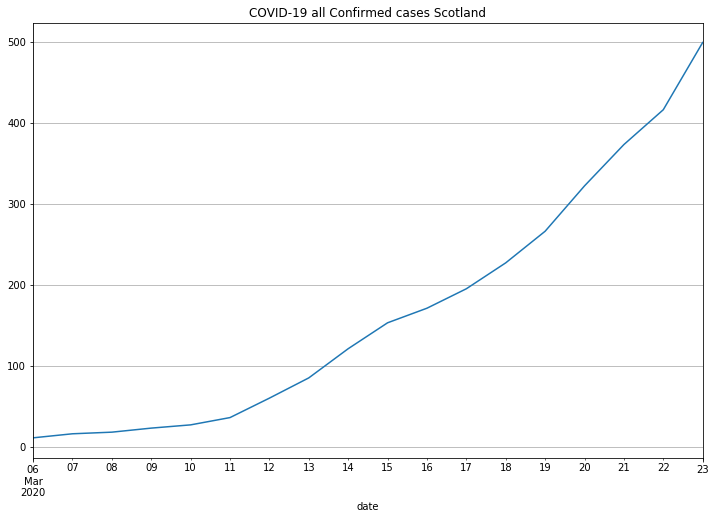

In [164]:
all_results.counts.sum(axis=1).plot(figsize=(12,8), title='COVID-19 all Confirmed cases Scotland', grid=True)
plt.savefig('output/all_confirmed_cases_time_series.png')

In [43]:
print("Daily increase of cases")
daily_increase_confirmed_cases = all_results.counts.sum(axis=1).diff()
daily_increase_confirmed_cases.to_csv('data/daily_increase_confirmed_cases.csv')

Daily increase of cases


In [46]:
print("Percentage of positive test daily")
percentage_of_positive_cases_daily = (all_results.counts.sum(axis=1).diff()/all_results.tests.diff() * 100)
percentage_of_positive_cases_daily.to_csv('data/percentage_of_positive_cases_daily')
print(percentage_of_positive_cases_daily)

Percentage of positive test daily
date
2020-03-06          NaN
2020-03-07     3.225806
2020-03-08     0.722022
2020-03-09     3.472222
2020-03-10     3.007519
2020-03-11    10.975610
2020-03-12     4.166667
2020-03-13     5.924171
2020-03-14     8.977556
2020-03-15     6.095238
2020-03-16     2.748092
2020-03-17     6.837607
2020-03-18     3.786982
2020-03-19     5.726872
2020-03-20     7.197943
2020-03-21     7.193230
2020-03-22    10.238095
dtype: float64


In [49]:
print("% increase cases across Scotland")
percentage_increase_cases_daily = round(all_results.counts.sum(axis=1).diff()/all_results.counts.sum(axis=1) * 100, 2)[1:]
percentage_increase_cases_daily.to_csv('data/percentage_increase_cases_daily.csv')
print(percentage_increase_cases_daily)

% increase cases across Scotland
date
2020-03-07    31.25
2020-03-08    11.11
2020-03-09    21.74
2020-03-10    14.81
2020-03-11    25.00
2020-03-12    40.00
2020-03-13    29.41
2020-03-14    29.75
2020-03-15    20.92
2020-03-16    10.53
2020-03-17    12.31
2020-03-18    14.10
2020-03-19    14.66
2020-03-20    17.39
2020-03-21    13.67
2020-03-22    10.34
dtype: float64


In [56]:
percentage_increases = ScotlandCOVID19.calculate_percentage_increases(all_results.counts)
percentage_increases_numbers = percentage_increases.copy()
percentage_increases = percentage_increases.replace(100,'First Case Confirmed')
percentage_increases.to_csv('data/daily_percentage_increase_by_health_board.csv')
percentage_increases

Daily % increase,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22
Health Board,,,,,,,,,,,,,,,,
Ayrshire and Arran,0,0.00,0,0.00,66.67,25.00,0.00,33.33,0.00,14.29,-16.67,33.33,25.00,25.00,23.81,16.00
Borders,NaN,NaN,NaN,NaN,First Case Confirmed,0.00,33.33,40,28.57,0,0.00,0.00,12.50,11.11,10.00,9.09
Dumfries and Galloway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,First Case Confirmed,0.00,75.00,33.33,40.00,23.08,18.75
Fife,0,0.00,0,0.00,0,33.33,25.00,33.33,14.29,0,0.00,12.50,11.11,25.00,7.69,18.75
Forth Valley,0,0.00,0,0.00,0,66.67,0.00,0,40.00,0,16.67,20.00,11.76,26.09,14.81,10.00
Grampian,25,0.00,0,33.33,0,14.29,36.36,-22.22,25.00,0,45.45,8.33,-33.33,5.26,5.00,13.04
Greater Glasgow and Clyde,50,33.33,0,0.00,40,50.00,52.38,32.26,20.51,11.36,10.20,14.04,19.72,21.98,17.27,15.38
Highland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,First Case Confirmed,50.00,0,60.00,0.00,16.67,0.00,25.00,0.00
Lanarkshire,First Case Confirmed,0.00,33.33,0.00,25,42.86,0.00,30,37.50,20,4.76,16.00,24.24,19.51,16.33,0.00


In [63]:
min_days_present = (~percentage_increases.isna()).sum(axis=1)
min_days_present.name = 'Minimum number of days of confirmed cases'
min_days_present.to_csv('data/minimum_days_present.csv')
min_days_present

Health Board
Ayrshire and Arran           16
Borders                      12
Dumfries and Galloway         7
Fife                         16
Forth Valley                 16
Grampian                     16
Greater Glasgow and Clyde    16
Highland                      9
Lanarkshire                  16
Lothian                      16
Shetland                     14
Tayside                      16
Name: Minimum number of days of confirmed cases, dtype: int64

In [62]:
print("Warning there is a varying time period for each Health board, see cell above minimum days present")
mean_daily_percent_increase_by_board = round(
    percentage_increases.mean(axis=1), 2)
mean_daily_percent_increase_by_board.name = "Mean % increase 6-22th March"
mean_daily_percent_increase_by_board.sort_values(inplace=True)
mean_daily_percent_increase_by_board.to_csv('data/mean_daily_percent_increase_by_board.csv')
mean_daily_percent_increase_by_board

Warning there is a varying time period for each Health board, see cell above minimum days present


Health Board
Shetland                     10.62
Tayside                      10.76
Borders                      11.62
Ayrshire and Arran           11.95
Fife                         13.42
Grampian                     13.88
Lanarkshire                  14.65
Lothian                      17.18
Forth Valley                 18.73
Highland                     21.67
Greater Glasgow and Clyde    23.16
Dumfries and Galloway        31.69
Name: Mean % increase 6-22th March, dtype: float64

In [61]:
all_results

            Deaths of confirmed cases  Tests concluded
date                                                  
2020-03-06                          0             1525
2020-03-07                          0             1680
2020-03-08                          0             1957
2020-03-09                          0             2101
2020-03-10                          0             2234
2020-03-11                          0             2316
2020-03-12                          0             2892
2020-03-13                          1             3314
2020-03-14                          1             3715
2020-03-15                          1             4240
2020-03-16                          1             4895
2020-03-17                          2             5246
2020-03-18                          3             6091
2020-03-19                          6             6772
2020-03-20                          6             7550
2020-03-21                          7             8259
2020-03-22

## Linking Council areas to Health Boards to quantify cases in terms of population

In [76]:
def get_council_areas_and_relationship_to_health_board():
    tables = pd.read_html('https://en.wikipedia.org/wiki/Subdivisions_of_Scotland')
    council_areas = tables[2].copy()
    council_areas.set_index('Council area', inplace=True)
    return council_areas, tables[4].copy()

In [77]:
council_areas, health_board_to_council = get_council_areas_and_relationship_to_health_board()

In [79]:
scottish_population = council_areas.sum()[1]

In [167]:
percentage_population_tested = all_results.tests/scottish_population*100

In [168]:
percentage_population_tested
percentage_population_tested.to_csv('percentage_population_tested.csv')
percentage_population_tested

date
2020-03-06    0.028043
2020-03-07    0.030893
2020-03-08    0.035987
2020-03-09    0.038635
2020-03-10    0.041081
2020-03-11    0.042588
2020-03-12    0.053180
2020-03-13    0.060940
2020-03-14    0.068314
2020-03-15    0.077968
2020-03-16    0.090013
2020-03-17    0.096468
2020-03-18    0.112006
2020-03-19    0.124529
2020-03-20    0.138835
2020-03-21    0.151873
2020-03-22    0.159596
2020-03-23    0.172192
Name: Tests concluded, dtype: float64

In [243]:
council_areas = council_areas.loc[council_areas.index.sort_values()]

In [83]:
health_board_to_council.set_index(health_board_to_council.columns[0], inplace=True)
health_board_to_council.rename({'Council areas':'council_areas'}, axis=1, inplace=True)
health_board_to_council = health_board_to_council.council_areas.str.rsplit(' and ',1, expand=True)

In [84]:
# Forth Valley
health_board_to_council.iloc[4].name = health_board_to_council.iloc[4].name.rsplit(' ', 5)[0]

Splitting on final ' and ' above create issues for the following areas

In [92]:
# Handle Perth and Kinross
health_board_to_council.loc['Tayside'].iloc[1] = health_board_to_council.loc['Tayside'].iloc[1].split(' and ')[0]
health_board_to_council.loc['Tayside'].iloc[-1] = 'Perth and Kinross'

In [86]:
# Handle Dumfries and Galloway
health_board_to_council.iloc[2][0] = health_board_to_council.iloc[2].name

In [87]:
health_board_to_council = health_board_to_council.iloc[:,0].str.split(', ', expand=True).join(health_board_to_council.iloc[:,1], rsuffix='_1')

In [88]:
health_board_to_council.loc['Dumfries and Galloway'][-1] = None

In [89]:
# Use council area naming
health_board_to_council.iloc[-1][0] = 'Na h-Eileanan Siar (Western Isles)'

In [96]:
# Drop the Forth Valley suffix
health_board_to_council.rename({health_board_to_council.index[4]: health_board_to_council.index[4].rsplit(' ', 5)[0]}, inplace=True)

In [97]:
health_board_populations = ScotlandCOVID19.get_population_for_health_board(health_board_to_council, council_areas)

In [99]:
health_board_populations

Ayrshire and Arran                369670
Borders                           115270
Dumfries and Galloway             148790
Fife                              371910
Forth Valley                      306070
Grampian                          584550
Greater Glasgow and Clyde        1174980
Highland                          321800
Lanarkshire                       659200
Lothian                           897770
Orkney                             22190
Shetland                           22990
Tayside                           416080
Western Isles (Eileanan Siar)      26830
Name: Population mid 2018 ONS estimate, dtype: int64

In [101]:
last_counts = all_results.counts.iloc[-1]

In [104]:
percentage_confirmed_cases_by_health_board_population = (last_counts / health_board_populations * 100).sort_values(ascending=False)
print("Percentage of confirmed cases in population by health board")
print(percentage_confirmed_cases_by_health_board_population)
percentage_confirmed_cases_by_health_board_population.to_csv('data/percentage_confirmed_cases_by_health_board_population.csv')

Percentage of confirmed cases in population by health board
Shetland                         0.104393
Greater Glasgow and Clyde        0.011064
Dumfries and Galloway            0.010753
Forth Valley                     0.009802
Borders                          0.009543
Tayside                          0.009133
Lanarkshire                      0.007433
Ayrshire and Arran               0.006763
Lothian                          0.005124
Fife                             0.004302
Grampian                         0.003935
Highland                         0.002486
Orkney                                NaN
Western Isles (Eileanan Siar)         NaN
dtype: float64


In [105]:
health_board_to_council.to_csv('data/health_board_to_council.csv')

In [106]:
council_areas.to_csv('data/council_areas.csv')

In [109]:
health_boards = gpd.read_file('gis/scottish_health_boards.gpkg', layer='scottish_health_boards')

In [110]:
health_boards.set_index('Name', inplace=True)

In [111]:
health_boards.index.sort_values()

Index(['Aberdeen City', 'Clackmannanshire', 'Dumfries and Galloway',
       'Dundee City', 'East Ayrshire', 'East Dunbartonshire', 'Fife',
       'Highland', 'Midlothian', 'Na h-Eileanan an Iar', 'Orkney Islands',
       'Scottish Borders', 'Shetland Islands', 'South Lanarkshire'],
      dtype='object', name='Name')

In [154]:
health_boards

,Area_Code,Area_Description,File_Name,Feature_Serial_Number,Collection_Serial_Number,Global_Polygon_ID,Admin_Unit_ID,Census_Code,Hectares,Non_Inland_Area,Area_Type_Code,Area_Type_Description,Non_Area_Type_Code,Non_Area_Type_Description,layer,path,geometry
Name,,,,,,,,,,,,,,,,,
Forth Valley,UTA,Unitary Authority,CLACKMANNANSHIRE,40,40,80813,30418,S12000005,16391.263,494.051,AA,CIVIL ADMINISTRATION AREA,None,None,Forth_Valley,C:\Users\james.morrison\Scotland_COVID-19\gis\...,"(POLYGON ((278764.3 678216.9019000001, 278755...."
Tayside,UTA,Unitary Authority,DUNDEE_CITY,43,43,124308,30215,S12000042,6222.375,239.278,AA,CIVIL ADMINISTRATION AREA,None,None,Tayside,C:\Users\james.morrison\Scotland_COVID-19\gis\...,"(POLYGON ((348824.8021 731013.799, 348819.2037..."
Greater Glasgow and Clyde,UTA,Unitary Authority,EAST_DUNBARTONSHIRE,44,44,80980,30501,S12000045,17448.902,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,Greater_Glasgow_and_Clyde,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((250331.0996 650306.0013, 250324.000..."
Lothian,UTA,Unitary Authority,MIDLOTHIAN,52,52,127110,30634,S12000019,35527.159,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,Lothian,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((313763.3971 679505.0032, 313757.501..."
Borders,UTA,Unitary Authority,SCOTTISH_BORDERS,57,57,127095,36552,S12000026,474268.496,350.255,AA,CIVIL ADMINISTRATION AREA,None,None,Borders,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((304665.4998 614182.6015, 304661.501..."
Lanarkshire,UTA,Unitary Authority,SOUTH_LANARKSHIRE,60,60,123461,30847,S12000029,177402.237,12.517,AA,CIVIL ADMINISTRATION AREA,None,None,Lanarkshire,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((304665.4998 614182.6015, 304659.497..."
Ayrshire and Arran,UTA,Unitary Authority,EAST_AYRSHIRE,84,84,122880,43393,S12000008,127034.203,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,Ayrshire_and_Arran,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((201916.1997 600444.404, 201918.4011..."
Fife,UTA,Unitary Authority,FIFE,100,100,128610,30419,S12000047,137618.775,5080.665,AA,CIVIL ADMINISTRATION AREA,None,None,Fife,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((345119.8014 729394.3026000001, 3451..."
Dumfries and Galloway,UTA,Unitary Authority,DUMFRIES_AND_GALLOWAY,102,102,125698,31903,S12000006,667631.485,23987.376,AA,CIVIL ADMINISTRATION AREA,None,None,Dumfries_and_Galloway,C:/Users/james.morrison/Scotland_COVID-19/gis/...,"(POLYGON ((300762.2005 557416.3086, 300753.86 ..."


In [112]:
health_board_name_mapping = {
    'Aberdeen City': 'Grampian',
    'Clackmannanshire': 'Forth Valley',
    'Dundee City': 'Tayside',
    'East Ayrshire': 'Ayrshire and Arran',
    'East Dunbartonshire': 'Greater Glasgow and Clyde',
    'Midlothian': 'Lothian',
    'Na h-Eileanan an Iar': 'Western Isles',
    'Orkney Islands': 'Orkney',
    'Scottish Borders': 'Borders',
    'Shetland Islands': 'Shetland',
    'South Lanarkshire': 'Lanarkshire'
}

In [113]:
# Ensure naming is consistent with names used on Scottish Government COVID-19 page
health_boards.rename(health_board_name_mapping, inplace=True)

In [117]:
health_board_geo_series = health_boards.geometry

In [118]:
health_board_geo_series = health_board_geo_series[health_board_geo_series.index.sort_values()]

In [119]:
health_board_geo_series

Name
Ayrshire and Arran           (POLYGON ((201916.1997 600444.404, 201918.4011...
Borders                      (POLYGON ((304665.4998 614182.6015, 304661.501...
Dumfries and Galloway        (POLYGON ((300762.2005 557416.3086, 300753.86 ...
Fife                         (POLYGON ((345119.8014 729394.3026000001, 3451...
Forth Valley                 (POLYGON ((278764.3 678216.9019000001, 278755....
Grampian                     (POLYGON ((383521.1983 771234.6959, 383524.298...
Greater Glasgow and Clyde    (POLYGON ((250331.0996 650306.0013, 250324.000...
Highland                     (POLYGON ((173254.001 604986.004, 173258.5028 ...
Lanarkshire                  (POLYGON ((304665.4998 614182.6015, 304659.497...
Lothian                      (POLYGON ((313763.3971 679505.0032, 313757.501...
Orkney                       (POLYGON ((331563.93 1030321.74, 331571.33 103...
Shetland                     (POLYGON ((452156 1206081.5, 452163.5 1206078,...
Tayside                      (POLYGON ((348824.

In [156]:
def get_all_recent_counts(all_results):
    """include areas with no confirmed cases"""
    recent_counts = all_results.counts.iloc[-1]
    zero_counts = pd.Series({'Orkney':0, 'Western Isles':0})
    return pd.concat([recent_counts, zero_counts])

In [157]:
all_recent_counts = get_all_recent_counts(all_results)

In [158]:
health_board_geo_df = gpd.GeoDataFrame(all_recent_counts, geometry=health_board_geo_series.geometry)

In [159]:
date = str(all_results.counts.index[-1])[:10]

In [160]:
health_board_geo_df.rename({0: date}, axis=1, inplace=True)

In [161]:
health_board_geo_df

,2020-03-23,geometry
Ayrshire and Arran,34,"(POLYGON ((201916.1997 600444.404, 201918.4011..."
Borders,12,"(POLYGON ((304665.4998 614182.6015, 304661.501..."
Dumfries and Galloway,18,"(POLYGON ((300762.2005 557416.3086, 300753.86 ..."
Fife,19,"(POLYGON ((345119.8014 729394.3026000001, 3451..."
Forth Valley,40,"(POLYGON ((278764.3 678216.9019000001, 278755...."
Grampian,24,"(POLYGON ((383521.1983 771234.6959, 383524.298..."
Greater Glasgow and Clyde,152,"(POLYGON ((250331.0996 650306.0013, 250324.000..."
Highland,12,"(POLYGON ((173254.001 604986.004, 173258.5028 ..."
Lanarkshire,58,"(POLYGON ((304665.4998 614182.6015, 304659.497..."
Lothian,59,"(POLYGON ((313763.3971 679505.0032, 313757.501..."


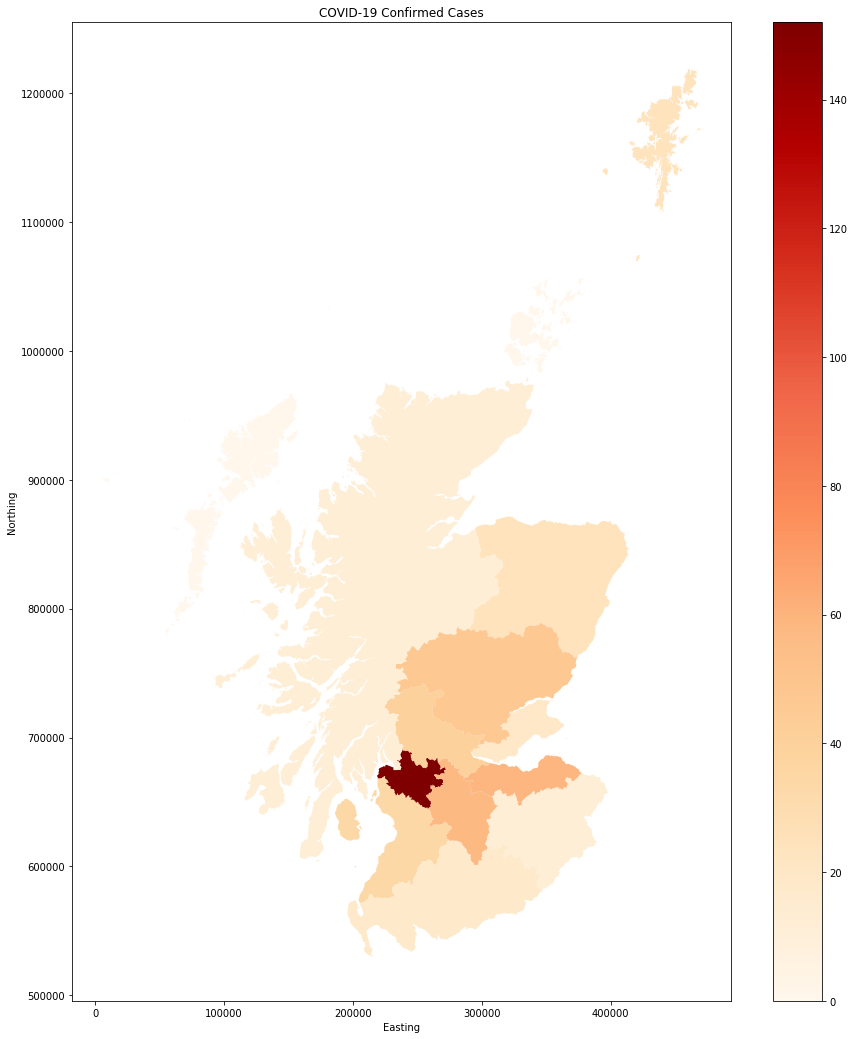

In [185]:
health_board_geo_df.plot(column='2020-03-23', figsize=(15,18), legend=True, legend_kwds={'label': "Confirmed Cases Concluded"}, cmap='OrRd')
plt.title('COVID-19 Confirmed Cases')
plt.ylabel('Northing')
plt.xlabel('Easting')
plt.savefig("Confirmed_Cases_20200323.png")

In [162]:
health_board_geo_df.to_file('gis/scottish_health_board_counts_' + date + '.gpkg', driver='GPKG')

## Comparison with wikipedia data

In [472]:
wiki_data = pd.read_csv('wikipedia_numbers.csv', index_col=0)

In [153]:
initial_counts = all_results.counts.iloc[0]

In [157]:
count_difference.sum() + initial_counts

Health Board
Ayrshire and Arran            21
Borders                       10
Dumfries and Galloway         13
Fife                          13
Forth Valley                  27
Grampian                      20
Greater Glasgow and Clyde    110
Highland                       8
Lanarkshire                   49
Lothian                       44
Shetland                      24
Tayside                       34
dtype: int64

In [477]:
count_difference = all_results.counts.diff().fillna(0).astype('int')

In [475]:
wiki_data

,A&A,BOR,D&G,FIF,FV,GRA,GGC,HLD,LAN,LOT,SHE,TAY
2020/03/02,0,0,0,0,0,0,0,0,0,0,0,1
2020/03/03,0,0,0,0,0,0,0,0,0,0,0,0
2020/03/04,1,0,0,0,0,1,0,0,0,0,0,0
2020/03/05,0,0,0,0,1,1,1,0,0,0,0,0
2020/03/06,0,0,0,2,1,1,0,0,0,1,0,0
2020/03/07,0,0,0,0,0,1,1,0,2,1,0,0
2020/03/08,0,0,0,0,0,0,1,0,0,1,0,0
2020/03/09,0,0,0,0,0,0,0,0,1,2,2,0
2020/03/10,0,0,0,0,0,2,0,0,0,2,0,0
2020/03/11,2,2,0,0,0,0,2,0,1,1,0,1


In [478]:
differences = pd.DataFrame(count_difference.values - wiki_data[4:].values, index = count_difference.index, columns=count_difference.columns)

In [479]:
differences

Health board,Ayrshire and Arran,Borders,Dumfries and Galloway,Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Shetland,Tayside
date,,,,,,,,,,,,
2020-03-06,0,0,0,-2,-1,-1,0,0,0,-1,0,0
2020-03-07,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-08,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-10,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0,0,-2
2020-03-14,0,0,0,0,0,0,0,0,0,0,0,0
